In [1]:
import os
os.getcwd()

'C:\\Users\\jwill\\Jupyter Notebooks'

In [2]:
%cd "C:\Users\jwill\Documents\ACE"

C:\Users\jwill\Documents\ACE


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist

np.random.seed(0)

seeds = pd.read_csv('Prep for Ra.csv')

In [4]:
# Preview the first 5 lines of the loaded data 
seeds.head()

,a,b,c,d,e,f,g,h,i,j,...,l,m,n,o,p,q,r,s,t,u
0,5,1,5,5,3,1,5,1,4,1,...,3,3,1,5,1,5,5,1,4,4
1,5,5,5,2,5,2,5,5,5,5,...,5,2,2,5,5,4,5,4,5,2
2,5,2,2,2,4,1,5,5,3,1,...,1,2,4,4,2,2,2,3,4,2
3,4,4,4,4,3,4,4,4,4,3,...,2,3,2,3,3,4,4,2,4,4
4,4,3,3,4,3,2,4,2,3,2,...,2,2,2,4,2,4,5,2,2,3


In [5]:
X=seeds
X.head()

,a,b,c,d,e,f,g,h,i,j,...,l,m,n,o,p,q,r,s,t,u
0,5,1,5,5,3,1,5,1,4,1,...,3,3,1,5,1,5,5,1,4,4
1,5,5,5,2,5,2,5,5,5,5,...,5,2,2,5,5,4,5,4,5,2
2,5,2,2,2,4,1,5,5,3,1,...,1,2,4,4,2,2,2,3,4,2
3,4,4,4,4,3,4,4,4,4,3,...,2,3,2,3,3,4,4,2,4,4
4,4,3,3,4,3,2,4,2,3,2,...,2,2,2,4,2,4,5,2,2,3


In [6]:

def k_means(X, K):
    # Keep track of history so you can see K-Means in action
    centroids_history = []
    labels_history = []
    
    # Randomly initialize Kcentroids
    rand_index = np.random.choice(X.shape[0], K)  
    centroids = X[rand_index]
    centroids_history.append(centroids)
    
    # While loop repeats process until difference between new/old centroids = 0 
    while True:
        # Euclidean distances are calculated for each point relative to centroids, and then np.argmin returns
        # the index location of the minimal distance - which cluster a point is assigned to
        labels = np.argmin(cdist(X, centroids), axis=1)
        labels_history.append(labels)
        
        # Take mean of points within clusters to find new centroids
        new_centroids = np.array([X[labels == i].mean(axis=0)
                                for i in range(K)])
        centroids_history.append(new_centroids)
        
        # If old centroids and new centroids no longer change, K-Means is complete and end. Otherwise continue
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    
    return centroids, labels, centroids_history, labels_history

In [7]:
# Convert from Pandas dataframe to NumPy matrix
X_mat = X.values

In [8]:
# Four Segment Run
# Run our Seeds matrix through the k_means function we created earlier
# Create 4 segments
centroids, labels, centroids_history, labels_history = k_means(X_mat, 4)

In [9]:
# See what labels we got
print(labels)

[3 1 2 1 3 2 0 1 1 0 0 1 0 0 1 1 1 3 1 3 1 1 1 0 1 1 2 1 3 0 2 2 0 1 2 3 2
 1 2 0 2 0 1 0 0 2 0 1 0 2 1 0 1 2 3]


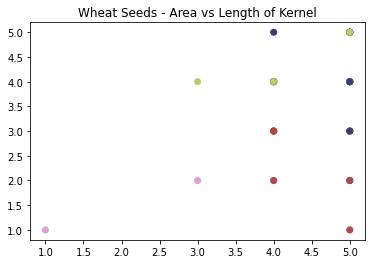

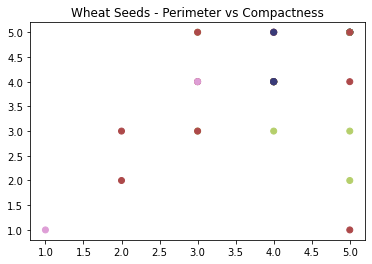

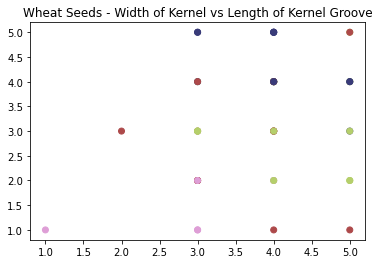

In [12]:
# Scatterplot with 6 segments
plt.scatter(X['a'], X['b'], c=labels, cmap='tab20b')
plt.title('Wheat Seeds - Area vs Length of Kernel')
plt.show()
# Scatterplot with different features
plt.scatter(X['c'], X['d'], c=labels, cmap='tab20b')
plt.title('Wheat Seeds - Perimeter vs Compactness')
plt.show()
# Scatterplot with different features
plt.scatter(X['e'], X['f'], c=labels, cmap='tab20b')
plt.title('Wheat Seeds - Width of Kernel vs Length of Kernel Groove')
plt.show()

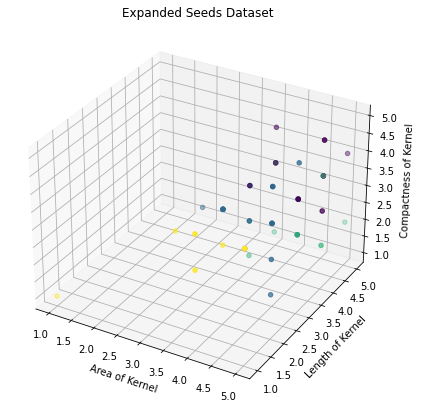

In [13]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d') # Where Axes3D is required
ax.scatter(X['a'], X['n'], X['u'], c=labels)
ax.set_xlabel('Area of Kernel')
ax.set_ylabel('Length of Kernel')
ax.set_zlabel('Compactness of Kernel')
ax.set_title('Expanded Seeds Dataset')
plt.show()

In [18]:
dendrogram = sch.dendrogram(sch.linkage(ace.data)

SyntaxError: unexpected EOF while parsing (<ipython-input-18-037040b8dc44>, line 1)